<a href="https://colab.research.google.com/github/JHON-EDV/stock-prediction-google/blob/master/ARIMA_AND_FEED_FOWARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


%matplotlib inline


dataset = pd.read_csv('https://raw.githubusercontent.com/JHON-EDV/stock-prediction-google/master/GOOG.csv',encoding='utf-8')
dataset


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [62]:
Google_dataset_train = dataset.iloc[:1237,:]
Google_dataset_test = dataset.iloc[1237:,:]

In [63]:
Google_dataset_test

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1237,GOOG,2021-05-13 00:00:00+00:00,2261.97,2276.6012,2242.7200,2261.0900,1333508,2261.97,2276.6012,2242.7200,2261.0900,1333508,0.0,1.0
1238,GOOG,2021-05-14 00:00:00+00:00,2316.16,2321.1400,2283.3200,2291.8300,1331248,2316.16,2321.1400,2283.3200,2291.8300,1331248,0.0,1.0
1239,GOOG,2021-05-17 00:00:00+00:00,2321.41,2323.3400,2295.0000,2309.3200,992416,2321.41,2323.3400,2295.0000,2309.3200,992416,0.0,1.0
1240,GOOG,2021-05-18 00:00:00+00:00,2303.43,2343.1500,2303.1600,2336.9056,865119,2303.43,2343.1500,2303.1600,2336.9056,865119,0.0,1.0
1241,GOOG,2021-05-19 00:00:00+00:00,2308.71,2316.7600,2263.5200,2264.4000,967544,2308.71,2316.7600,2263.5200,2264.4000,967544,0.0,1.0
1242,GOOG,2021-05-20 00:00:00+00:00,2356.09,2360.3400,2321.0900,2328.0400,1191593,2356.09,2360.3400,2321.0900,2328.0400,1191593,0.0,1.0
1243,GOOG,2021-05-21 00:00:00+00:00,2345.10,2368.9999,2342.3700,2365.9900,1141632,2345.10,2368.9999,2342.3700,2365.9900,1141632,0.0,1.0
1244,GOOG,2021-05-24 00:00:00+00:00,2406.67,2418.4800,2360.1100,2367.0000,1062189,2406.67,2418.4800,2360.1100,2367.0000,1062189,0.0,1.0
1245,GOOG,2021-05-25 00:00:00+00:00,2409.07,2432.8900,2402.9900,2420.0000,941928,2409.07,2432.8900,2402.9900,2420.0000,941928,0.0,1.0
1246,GOOG,2021-05-26 00:00:00+00:00,2433.53,2442.9440,2412.5150,2412.8350,1092819,2433.53,2442.9440,2412.5150,2412.8350,1092819,0.0,1.0


In [64]:
training_set = Google_dataset_train.loc[:,['close', 'open']].values

In [65]:
training_set

array([[ 718.27,  716.48],
       [ 718.92,  719.  ],
       [ 710.36,  714.91],
       ...,
       [2341.66, 2374.89],
       [2308.76, 2291.86],
       [2239.08, 2261.71]])

In [66]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [67]:
training_set_scaled

array([[0.02838848, 0.026148  ],
       [0.02875746, 0.02759683],
       [0.02389832, 0.02524535],
       ...,
       [0.9499157 , 0.97962434],
       [0.93123982, 0.93188757],
       [0.89168554, 0.91455331]])

In [72]:
X_train = []
y_train = []

for i in range(60, 1237):
    X_train.append(training_set_scaled[i-60:i,0:2])
    y_train.append(training_set_scaled[i,0:2])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))

In [73]:
y_train.shape

(1177, 2)

In [76]:
x_train.shape[1]

60

In [118]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()


regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 2)))
regressor.add(Dropout(0.2))             

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 2))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 13s 173ms/step - loss: 0.0119
Epoch 2/100
37/37 [==============================] - 6s 170ms/step - loss: 0.0024
Epoch 3/100
37/37 [==============================] - 6s 171ms/step - loss: 0.0023
Epoch 4/100
37/37 [==============================] - 6s 174ms/step - loss: 0.0020
Epoch 5/100
37/37 [==============================] - 6s 170ms/step - loss: 0.0018
Epoch 6/100
37/37 [==============================] - 6s 171ms/step - loss: 0.0018
Epoch 7/100
37/37 [==============================] - 6s 171ms/step - loss: 0.0018
Epoch 8/100
37/37 [==============================] - 6s 172ms/step - loss: 0.0018
Epoch 9/100
37/37 [==============================] - 6s 173ms/step - loss: 0.0019
Epoch 10/100
37/37 [==============================] - 6s 172ms/step - loss: 0.0016
Epoch 11/100
37/37 [==============================] - 6s 172ms/step - loss: 0.0016
Epoch 12/100
37/37 [==============================] - 6s 171ms/step - loss: 0.0016
Epoch 13/100

In [119]:
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 60, 100)           41200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [120]:
import matplotlib.pyplot as plt
dataset_test = Google_dataset_test.loc[:,['close', 'open']]
dataset_total = dataset.loc[:,['close', 'open'],]

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-2, 2)
inputs = sc.transform(inputs)

x_test = []

for i in range(60, 76):
      x_test.append(inputs[i-60:i,0:2])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 2))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price = Google_dataset_test.loc[:,['close', 'open']].values

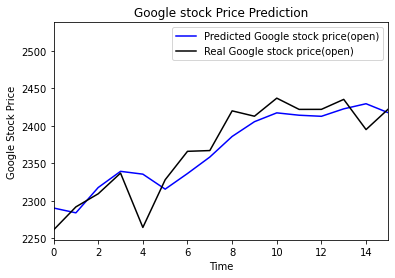

In [125]:
plt.plot(predicted_stock_price[:,1], color = 'blue', label = 'Predicted Google stock price(open)')
plt.plot(real_stock_price[:, 1], color = 'black', label = 'Real Google stock price(open)')
plt.title('Google stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.xlim(0,15)
plt.show()

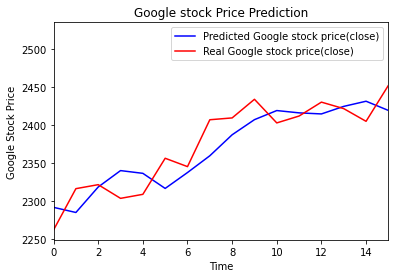

In [140]:
plt.plot(predicted_stock_price[:,0], color = 'blue', label = 'Predicted Google stock price(close)')
plt.plot(real_stock_price[:, 0], color = 'red', label = 'Real Google stock price(close)')
plt.title('Google stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.xlim(0,15)
plt.show()

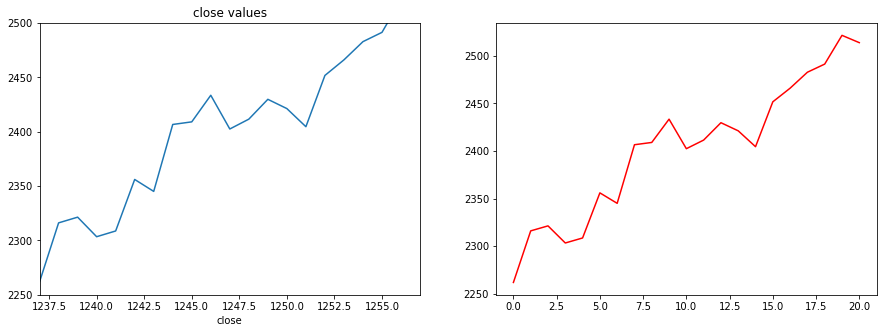

In [149]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(dataset['close']) 
plt.title('close values')
plt.xlabel('close')
plt.xlim(1237,1257)
plt.ylim(2250,2500)
plt.subplot(1,2,2)
plt.plot(real_stock_price[:, 0], color = 'red')

Text(0.5, 0, 'close')

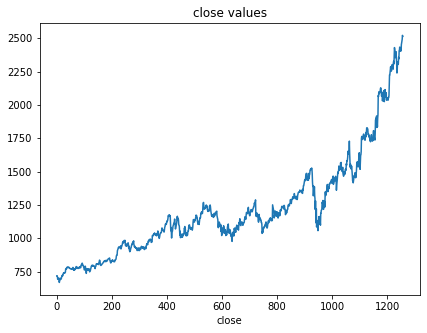

In [150]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(dataset['close']) 
plt.title('close values')
plt.xlabel('close')

# Arima Model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


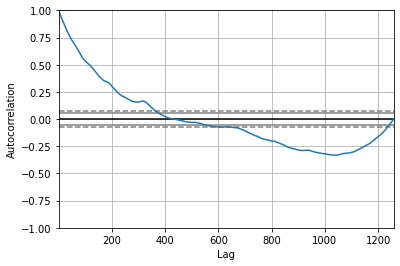

<Figure size 1080x360 with 0 Axes>

In [128]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series =  pd.read_csv('https://raw.githubusercontent.com/JHON-EDV/stock-prediction-google/master/GOOG.csv', header=0,  index_col = [])
series['date'] = pd.to_datetime(series['date'], format="%Y-%d-%m", errors='ignore')
series1 = series['close']
#series['date']
type(series)
#v = pd.date_range(start='2016-06-14', end='2021-06-11')
autocorrelation_plot(series1)
pyplot.figure(figsize=(15, 5))
pyplot.show()


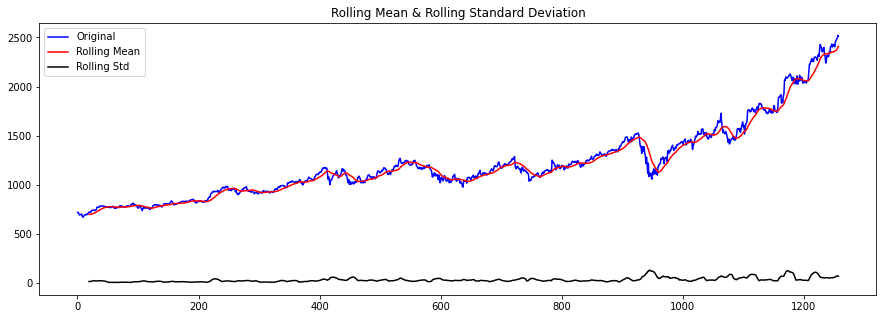

In [41]:
from matplotlib import pyplot as plt
rolling_mean = series1.rolling(window = 20).mean()
rolling_std = series1.rolling(window = 20).std()
plt.figure(figsize=(15, 5))
plt.plot(series1, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [44]:
result = adfuller(series1)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.968587312697841
p-value: 0.9986307166841111
Critical Values:
	1%: -3.4356560275160835
	5%: -2.8638831211270817
	10%: -2.568017509711682


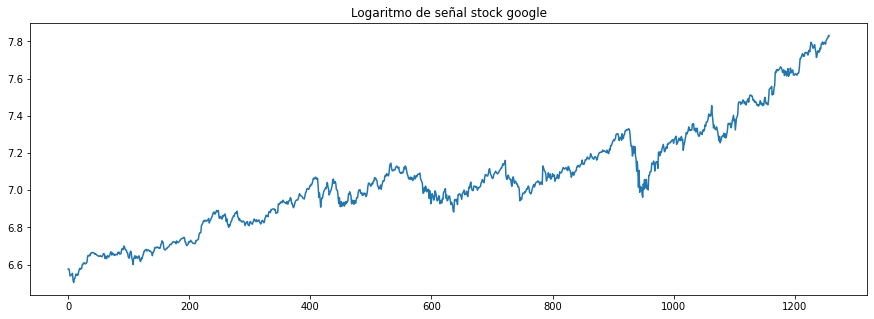

In [46]:
plt.figure(figsize=(15, 5))
df_log = np.log(series1)
plt.title('Logaritmo de señal stock google')
plt.plot(df_log)

In [49]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(series1)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

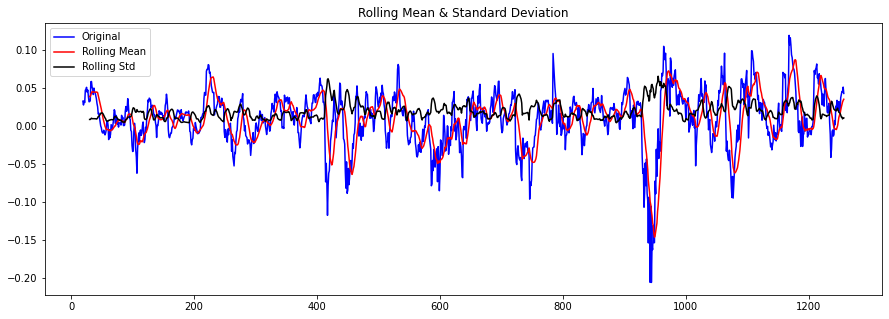

ADF Statistic: 1.968587312697841
p-value: 0.9986307166841111
Critical Values:
	1%: -3.4356560275160835
	5%: -2.8638831211270817
	10%: -2.568017509711682


In [54]:
plt.figure(figsize=(15, 5))
rolling_mean = df_log.rolling(window=20).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

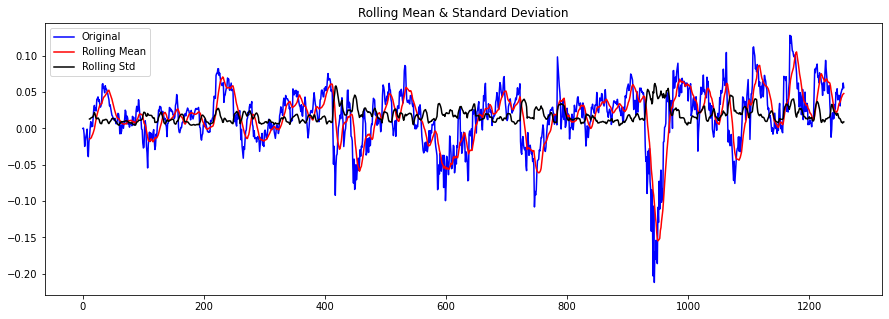

ADF Statistic: 1.968587312697841
p-value: 0.9986307166841111
Critical Values:
	1%: -3.4356560275160835
	5%: -2.8638831211270817
	10%: -2.568017509711682


In [55]:
plt.figure(figsize=(15, 5))
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

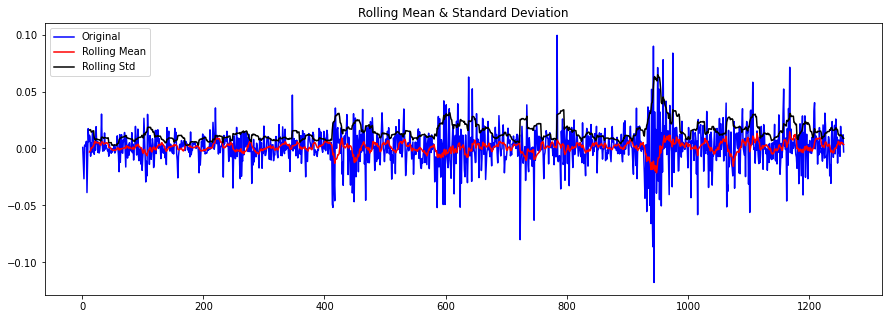

ADF Statistic: 1.968587312697841
p-value: 0.9986307166841111
Critical Values:
	1%: -3.4356560275160835
	5%: -2.8638831211270817
	10%: -2.568017509711682


In [57]:
plt.figure(figsize=(15, 5))
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

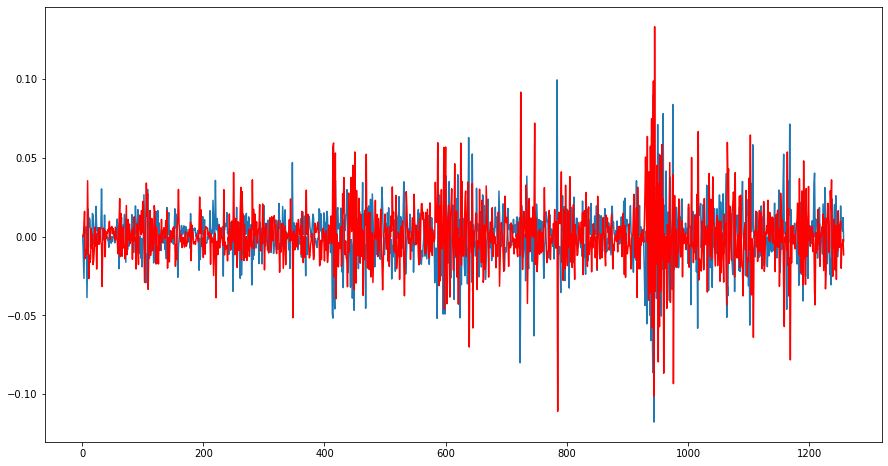

In [136]:
plt.figure(figsize=(15, 8))
#decomposition = seasonal_decompose(series1) 
model = ARIMA(df_log, order=(3,2,1))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color ='red')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


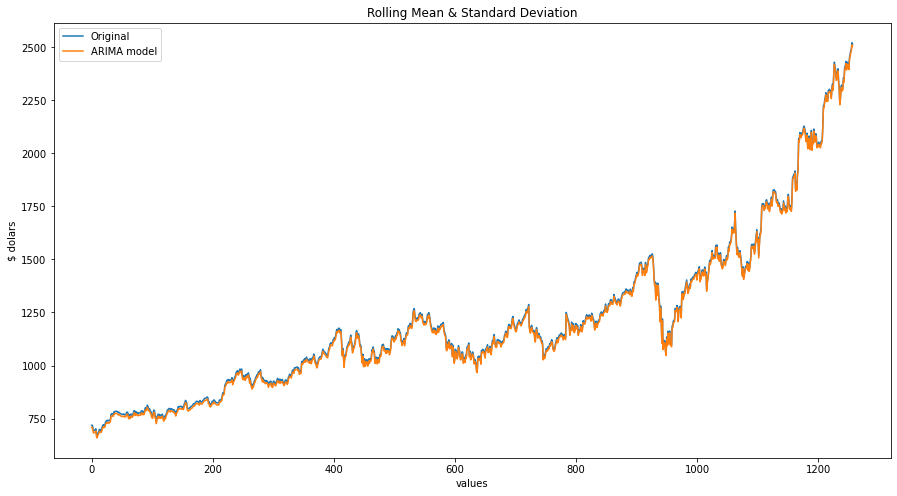

In [137]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(series1, index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(15, 8))
#v = pd.date_range(start='2018-1-1', end='2021-06-11')
plt.title('Rolling Mean & Standard Deviation')
plt.ylabel('$ dolars')
plt.xlabel('values')
plt.plot(series1, label='Original')
plt.plot(predictions_ARIMA_log-10, label='ARIMA model')
plt.legend(loc='best')
plt.show()



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:296: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)


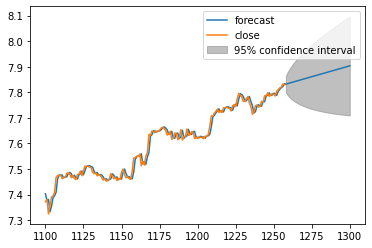

<Figure size 1080x360 with 0 Axes>

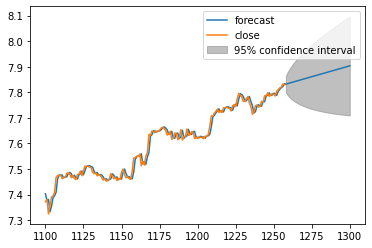

In [107]:
plt.figure(figsize=(15, 5))
results.plot_predict(1100,1300)

#Feed foward

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
import pandas as pd


pd =  pd.read_csv('https://raw.githubusercontent.com/JHON-EDV/stock-prediction-google/master/GOOG.csv', header=0,  index_col = [])

X = pd.copy()
X = X.drop(columns = ['symbol','date','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor','volume'])
print(X.shape)
print(X.tail())

(1258, 4)
        close      high        low     open
1253  2466.09  2468.000  2441.0725  2451.32
1254  2482.85  2494.495  2468.2400  2479.90
1255  2491.40  2505.000  2487.3300  2499.50
1256  2521.60  2523.260  2494.0000  2494.01
1257  2513.93  2526.990  2498.2900  2524.92


In [2]:
X.corr()

,close,high,low,open
close,1.000000,0.999528,0.999586,0.999083
high,0.999528,1.000000,0.999354,0.999575
low,0.999586,0.999354,1.000000,0.999499
open,0.999083,0.999575,0.999499,1.000000


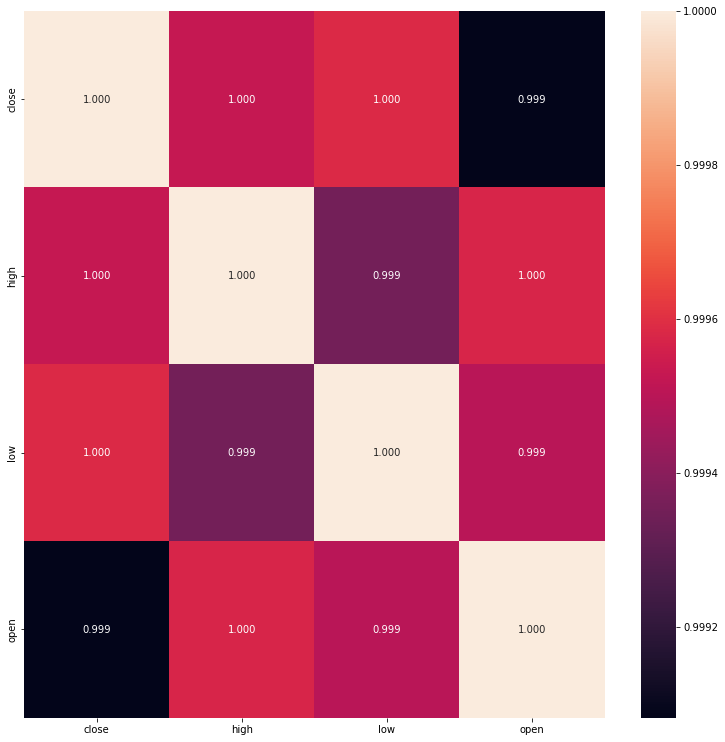

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(X.corr(), annot=True, fmt='.3f')

In [4]:
split_ratio = 0.2
X = X.values # Convert to NumPy array
split = int(len(X) * (1-split_ratio))
train_set = X[: split]
test_set = X[split:]
print(train_set.shape, test_set.shape)

(1006, 4) (252, 4)


In [5]:
train_set

array([[ 718.27,  722.47,  713.12,  716.48],
       [ 718.92,  722.98,  717.31,  719.  ],
       [ 710.36,  716.65,  703.26,  714.91],
       ...,
       [1456.16, 1468.  , 1443.21, 1445.36],
       [1465.85, 1474.26, 1456.27, 1459.54],
       [1403.84, 1454.47, 1402.  , 1442.48]])

In [6]:
import numpy as np

def supvervisedSeries(data, n, h):
  x, y = list (), list ()
  for i in range (len(data)-n-h+1):
    x.append(data[i:(i+n)])
    y.append(data[i+h+n-1])
  return np.array(x), np.array(y)
h = 1
n = 4
trainX, trainY = supvervisedSeries(train_set, n, h)
testX, testY = supvervisedSeries(test_set, n, h)
print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY: ", testY.shape)

trainX:  (1002, 4, 4)
trainY:  (1002, 4)
testX:  (248, 4, 4)
testY:  (248, 4)


In [7]:
testY = np.reshape(testY[:, 0], (testY [:, 0].shape[0], 1))
trainY = np.reshape(trainY[:, 0], (trainY[:, 0].shape[0], 1))
print("trainY: ", trainY.shape)
print("testY: ", testY.shape)

trainY:  (1002, 1)
testY:  (248, 1)


In [9]:
testX.shape[2]

4

In [10]:
from sklearn.preprocessing import MinMaxScaler
scalers = {}
for i in range (trainX.shape[2]):
  scalers[i] = MinMaxScaler()
  trainX[:, :, i] = scalers[i].fit_transform(trainX[:, :, i])
for i in range(testX.shape[2]):
  testX[:, :, i] = scalers[i].transform(testX[:, :, i])
# The target values are 2D arrays, which is easy to scale
scalerY = MinMaxScaler()
trainY = scalerY.fit_transform(trainY)
testY = scalerY.transform(testY)

In [12]:
trainX.shape[2]

4

In [13]:
# Flatten input (to support multivariate input)
n_input = trainX.shape[1]* trainX.shape[2]
trainX = trainX.reshape((trainX.shape[0], n_input))
n_input = testX.shape[1]* testX.shape[2]
testX = testX.reshape((testX.shape[0], n_input))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


# Create multilayered FFNN model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=trainX.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(trainY.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# Fit model
history = model.fit(trainX, trainY, epochs =60, verbose =1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1700      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 22,001
Trainable params: 22,001
Non-trainable params: 0
____________________________________________________

In [17]:
# Predict the test set
testX = testX.reshape((testX.shape[0], n_input))
predictions = model.predict(testX)
testX.shape

(248, 16)

In [18]:
from sklearn.metrics import mean_absolute_error

# Descale
predictions = scalerY.inverse_transform(predictions)
testY = scalerY.inverse_transform(testY)
# Mean absolute error
mae = mean_absolute_error(testY, predictions)
print("Test MAE: %.6f" % mae)

Test MAE: 363.354790


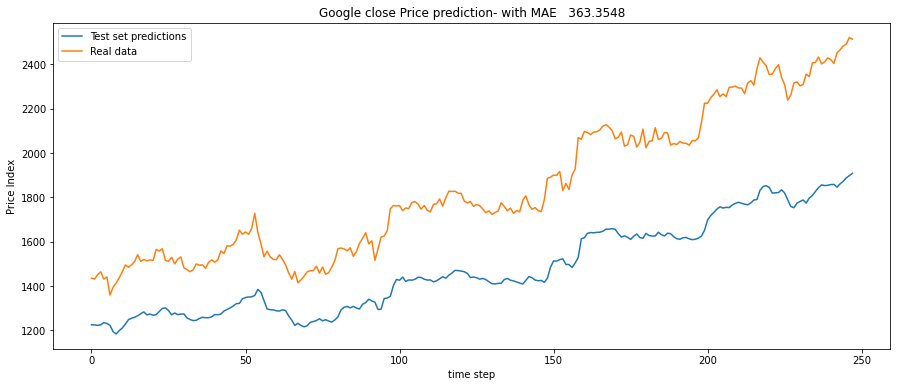

In [20]:
plt.figure(figsize=(15,6))
plt.plot(predictions, label="Test set predictions" )
plt.plot(testY, label="Real data")
plt.legend()
plt.ylabel('Price Index')
plt.xlabel('time step' )
plt.title ("Google close Price prediction- with MAE {:10.4f}".format(mae))
plt.show()